In [19]:
library(yaml)
library(tidyr)
library(data.table)
library(ggplot2)
library(cowplot)

theme_set(theme_cowplot())
options(repr.plot.width=5, repr.plot.height=5)

In [2]:
config <- yaml.load_file("../config_small.yaml")
results <- fread(file.path(config$ROOT, "cc_variance.csv"))
results <- separate(results, col = 'setting', sep = '/', c('scenario', 'analysis', 'scaling', 'feature_selection', 'method'))
results <- separate(results, col = 'method', sep = '_', c('method', 'output_type'))

In [11]:
head(results)

batch,before,after,score,scenario,analysis,scaling,feature_selection,method,output_type
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
celseq,0.024258838,0.005942101,0.24494581,pancreas,cc_variance,scaled,hvg,mnn,full
celseq2,0.009580875,0.001271884,0.13275240,pancreas,cc_variance,scaled,hvg,mnn,full
fluidigmc1,0.018237941,0.008014089,0.43941852,pancreas,cc_variance,scaled,hvg,mnn,full
smartseq2,0.078503855,0.005282099,0.06728458,pancreas,cc_variance,scaled,hvg,mnn,full
inDrop,0.037098831,0.032270383,0.86984906,pancreas,cc_variance,scaled,hvg,mnn,full
smarter,0.005215812,0.002431248,0.46613026,pancreas,cc_variance,scaled,hvg,mnn,full


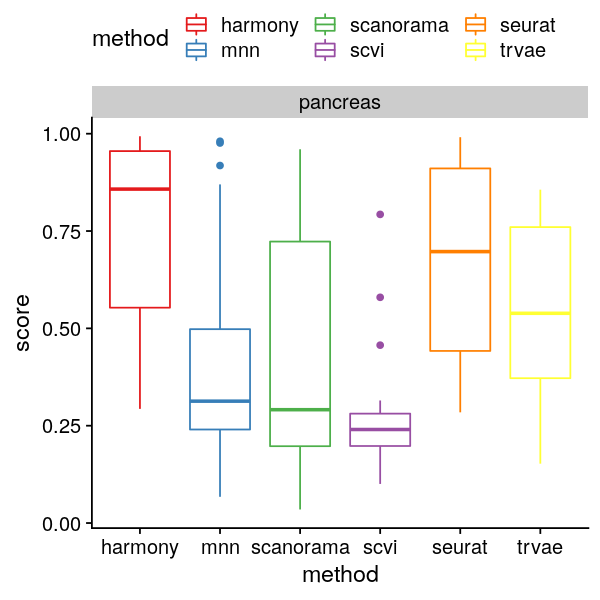

In [103]:
ggplot(results, aes(method, score, col=method)) +
    geom_boxplot() +
    facet_wrap(.~scenario) +
    scale_color_brewer(palette = 'Set1') +
    theme(legend.position = 'top')

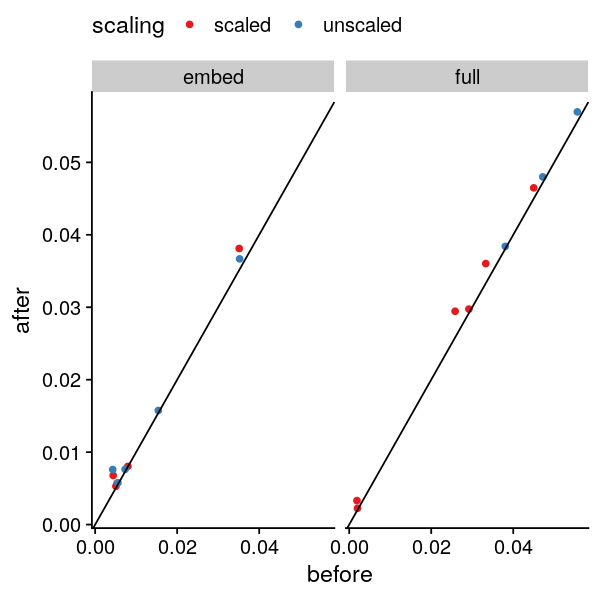

In [110]:
ggplot(results[after>before], aes(before, after, col=scaling)) +
    geom_point() + geom_abline() +
    facet_wrap(.~output_type) +
    scale_color_brewer(palette = 'Set1') +
    theme(legend.position = 'top')

In [100]:
#results[, lfc := (after/before)]
results[, orig := 1 - (abs(before-after)/before)]
results[, other := ((before - (before-after))/before)]

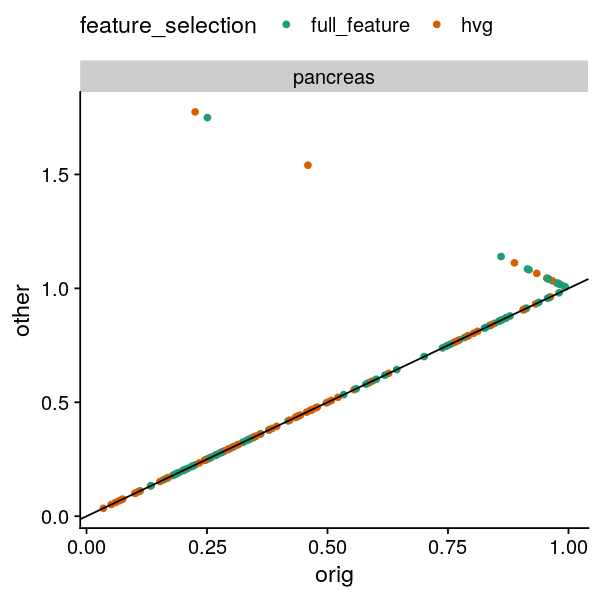

In [101]:
ggplot(results, aes(orig, other, col=feature_selection)) +
    geom_point() + geom_abline() +
    facet_wrap(.~scenario) +
    scale_color_brewer(palette = 'Dark2') +
    theme(legend.position = 'top')